**Import necessary libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import joblib


**Load the dataset**

In [2]:

df = pd.read_csv('/content/test_data.csv')

**Display basic information**

In [3]:

print("Dataset Information:")
print(df.info())
print("\nFirst 5 records:")
print(df.head())
print("\nLast 5 records:")
print(df.tail())
print(f"\nDataset Dimensions: {df.shape}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   100 non-null    int64  
 1   PassengerId  100 non-null    int64  
 2   Survived     100 non-null    int64  
 3   Sex          100 non-null    int64  
 4   Age          100 non-null    float64
 5   Fare         100 non-null    float64
 6   Pclass_1     100 non-null    int64  
 7   Pclass_2     100 non-null    int64  
 8   Pclass_3     100 non-null    int64  
 9   Family_size  100 non-null    float64
 10  Title_1      100 non-null    int64  
 11  Title_2      100 non-null    int64  
 12  Title_3      100 non-null    int64  
 13  Title_4      100 non-null    int64  
 14  Emb_1        100 non-null    int64  
 15  Emb_2        100 non-null    int64  
 16  Emb_3        100 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 13.4 KB
None

First 5 records:
  

**Exploratory Data Analysis (EDA)**

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Count of survivors vs non-survivors
survived_counts = df['Survived'].value_counts()
print("\nSurvived Counts:")
print(survived_counts)


Missing Values:
Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64

Survived Counts:
Survived
0    64
1    36
Name: count, dtype: int64


**Pie chart of survivors vs non-survivors**

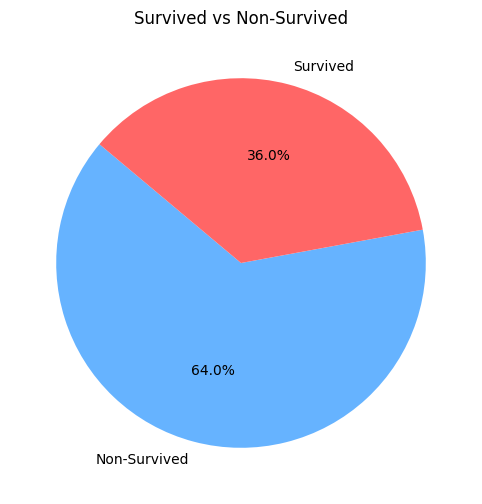

In [5]:
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['Non-Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666'])
plt.title('Survived vs Non-Survived')
plt.show()

The pie chart displays the distribution of the survived and non-survived samples. It shows that 64% of the samples did not survive, while 36% of the samples survived. This imbalance indicates that the dataset has more non-survived instances than survived ones, which can impact the model's performance and may require addressing through techniques such as resampling or using class weights.

**Heatmap to show correlations**

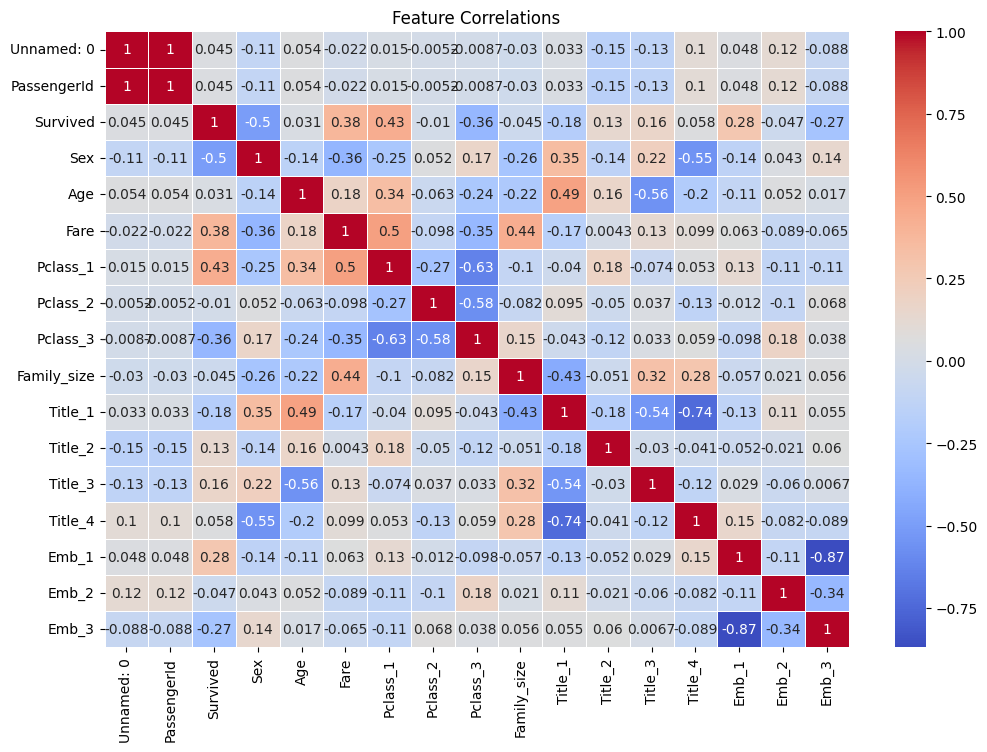

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlations')
plt.show()

The feature correlations heatmap illustrates the relationships between different features in the dataset. It shows that Fare and Pclass_1 have a strong positive correlation, and Survived has a moderate positive correlation with Fare and a moderate negative correlation with Sex. Many features exhibit weak or no correlation with each other, indicating that they are relatively independent in their influence on the target variable.

**Train-Test Split**

In [7]:
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the Model**

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train a RandomForestClassifier**

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

**Model Evaluation**

In [10]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.86      0.75      0.80         8

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20



**Confusion matrix**

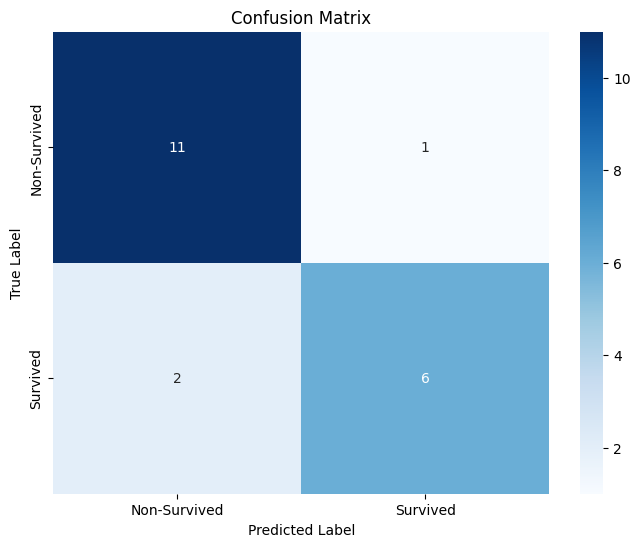

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Survived', 'Survived'], yticklabels=['Non-Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix provides a detailed breakdown of the model's prediction accuracy. It shows that the model correctly predicted 6 cases of survival (true positives) and 11 cases of non-survival (true negatives). However, there is 1 instance where the model incorrectly predicted a non-survived case as survived (false positive), and 2 instances where it incorrectly predicted a survived case as non-survived (false negatives). This indicates that while the model has a good overall accuracy, there are some misclassifications.

**Feature Importance**

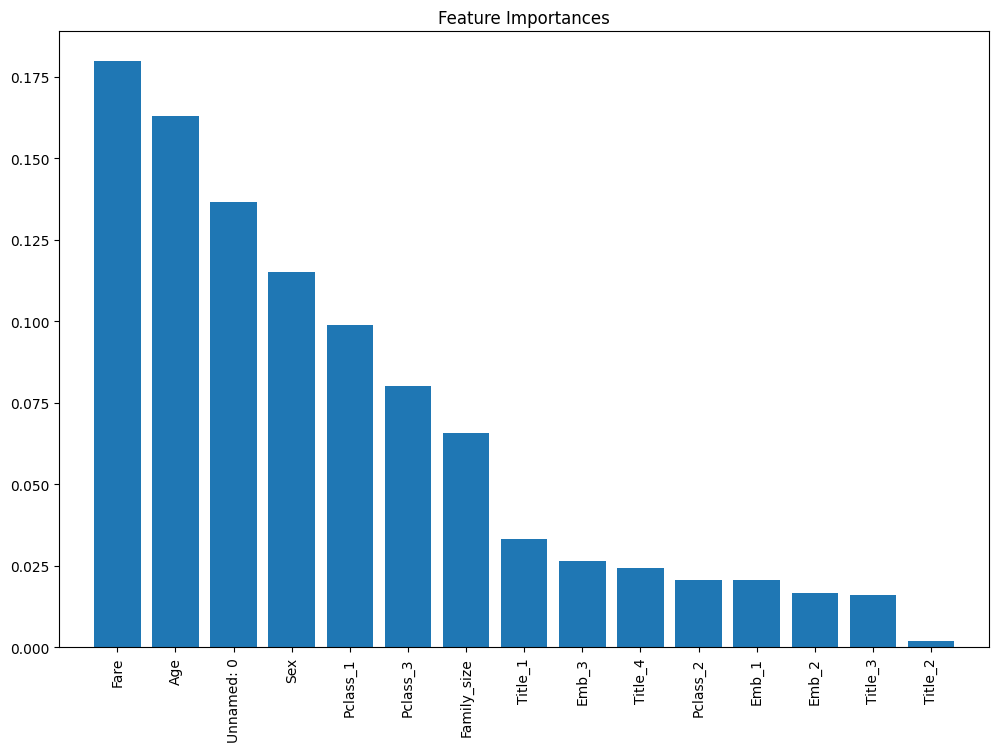

In [12]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

The feature importances bar chart reveals the significance of each feature in the model's predictions. The top features include Fare, Age, and Sex, which are the most influential in determining the model's output. Other significant features include Pclass_1, Family_size, and Title_1. On the other hand, features such as Title_2, Emb_2, and Pclass_3 have relatively low importance, indicating they contribute less to the model's predictive power.

**Receiver Operating Characteristic (ROC) Curve**

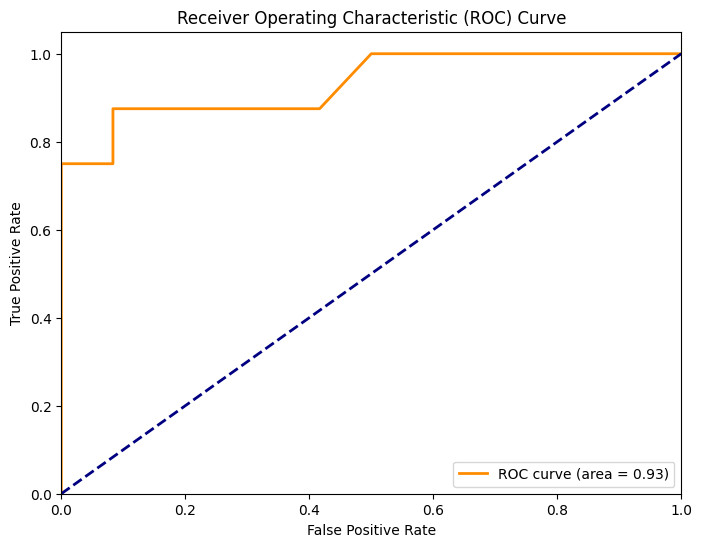

In [16]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve demonstrates the model's ability to distinguish between the positive and negative classes. The curve is well above the diagonal line, which represents a random guess, indicating good model performance. The Area Under the Curve (AUC) score is 0.93, which suggests that the model has a high ability to correctly classify positive and negative instances. A high AUC score, close to 1, reflects a strong model performance.

**Learning Curve**

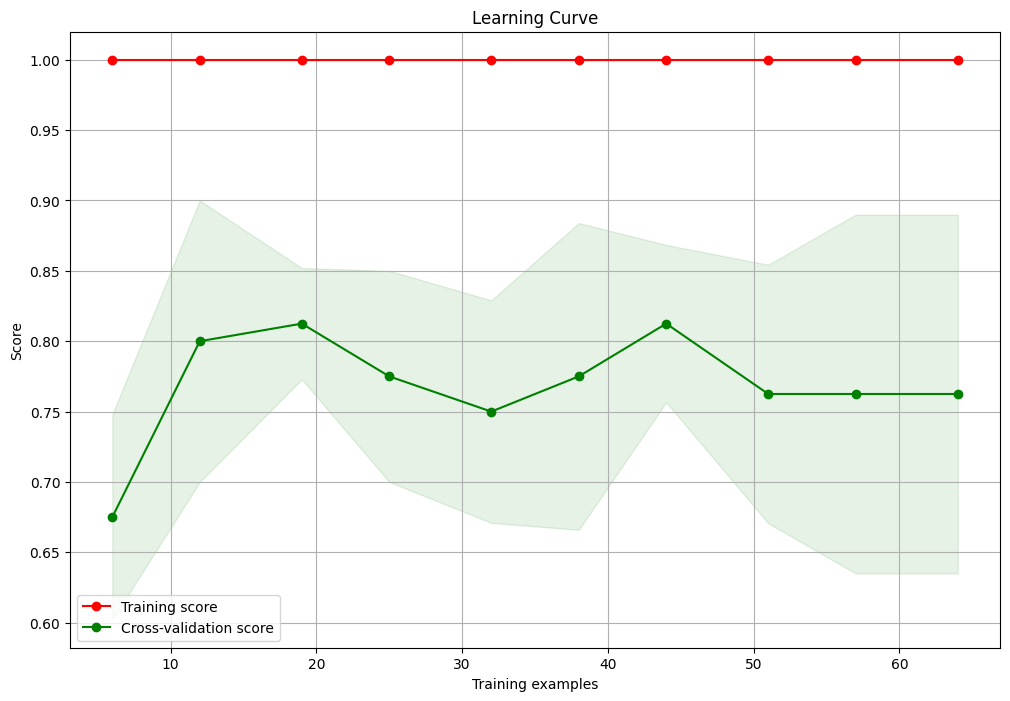

In [17]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()

The learning curve depicts the model's performance with respect to the training score and the cross-validation score as the number of training examples increases. The training score, represented by the red line, remains consistently high at 1.0, indicating that the model fits the training data exceptionally well. However, the cross-validation score, depicted by the green line, fluctuates and is generally lower than the training score. This discrepancy suggests that the model may be overfitting the training data, as it performs excellently on the training set but less consistently on the validation sets. The shaded area around the green line represents the variability in the cross-validation scores, with larger variability observed with fewer training examples, which stabilizes as the number of training examples increases.

**Save the model**

In [ ]:
joblib.dump(model, 'titanic_survival_classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')

**Summary of the model**
The task was to build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python. The final model achieved an accuracy of 0.85, indicating that it correctly predicted the survival status of 85% of the passengers in the test set. The classification report provides further insights into the model's performance. For the non-survived class (0), the precision is 0.85, recall is 0.92, and the F1-score is 0.88, which shows the model is highly effective at correctly identifying non-survived passengers. For the survived class (1), the precision is slightly higher at 0.86, but the recall drops to 0.75, resulting in an F1-score of 0.80. This indicates that while the model is good at identifying survived passengers, it misses a quarter of them. The macro and weighted averages for precision, recall, and F1-score are consistent, reinforcing the model's balanced performance across both classes. Overall, the model demonstrates a strong ability to predict survival with high accuracy, precision, and recall, making it a reliable tool for this classification task.

---

